# <center> Facial Keypoint Detection </center>

### Problem Description

**The objective of this task is to predict keypoint positions on face images. This can be used as a building block in several applications, such as:**

* tracking faces in images and video
* analyzing facial expressions
* detecting dysmorphic facial signs for medical diagnosis
* biometrics / face recognition

The dataset was obtained from the Kaggle competition [Facial Keypoints Detection](https://www.kaggle.com/c/facial-keypoints-detection/overview)

# Importing Required Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import (
    Flatten,
    Dense,
    Dropout,
    Conv2D,
    LeakyReLU,
    BatchNormalization,
    MaxPool2D,
)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


* matplotlib - Used for plotting. Sometimes can also be used for displaying images.
* Pandas     - For loading data and preprocessing the data.
* Numpy      - Used for utilities related to numerical computations.
* tensorflow - Framework for building deep learning networks.

# Data Acquistion

In [2]:
# unzipping the zip file containing the training data
!unzip "/kaggle/input/facial-keypoints-detection/training.zip"

Archive:  /kaggle/input/facial-keypoints-detection/training.zip
  inflating: training.csv            


In [3]:
# unzipping the zip file containing the testing data
!unzip "/kaggle/input/facial-keypoints-detection/test.zip"

Archive:  /kaggle/input/facial-keypoints-detection/test.zip
  inflating: test.csv                


In [4]:
# Loaind the train and test CSVs as dataframes
train_df=pd.read_csv('/kaggle/working/training.csv')
test_df=pd.read_csv('/kaggle/working/test.csv')

## Data Exploration

In [5]:
# Looking at first 5 records of train data
train_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


The last column in the data is the input image. The image which should be in the form of 2X2 grid has been flattened and provided as a string. The string contains the flattened pixel values separated by a space. The size of the original image before flattening was 96X96. Hence, each string will have 9216 numerical values each representing a pixel.

In [6]:
print(f"DataType of the values in the Image column: {type(train_df.iloc[0]['Image'])}")
print(f"Total number of pixels in a image: {len(train_df.iloc[0]['Image'].split())}")

DataType of the values in the Image column: <class 'str'>
Total number of pixels in a image: 9216


### Statistics about numerical features

In [7]:
train_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


**The facial keypoints that are available in the data are**
1. left_eye_center
1. right_eye_center
1. left_eye_inner_corner
1. left_eye_outer_corner
1. right_eye_inner_corner
1. right_eye_outer_corner
1. left_eyebrow_inner_end
1. left_eyebrow_outer_end
1. right_eyebrow_inner_end
1. right_eyebrow_outer_end
1. nose_tip
1. mouth_left_corner
1. mouth_right_corner
1. mouth_center_top_lip
1. mouth_center_bottom_lip

We have X and Y coordinates for each facial keypoint listed above in the dataset. `feature_name_x` will contain the X coordinate of the keypoint and `feature_name_y` will contain the Y coordinate of the keypoint. In total, we are detecting X and Y coordinates of above listed fifteen facial keypoints.

### Finding the count of null values in each feature

In [8]:
train_df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

# Data Visualization

In [9]:
# string the names of facial keypoints available
features=train_df.columns[:-1]
feature_names=[i.replace('_x','') for n,i in enumerate(features) if n%2==0 ]

In [10]:
# creating a dataframe that contains info about actual and pecentages of null values present in each feature
df=train_df[features]
null_stats=pd.DataFrame(df.isna().sum(),columns=['null_count'])
null_stats['total_values']=[len(df)]*len(null_stats)
null_stats['null_percentage']=null_stats['null_count']/null_stats['total_values']
null_stats['null_percentage']=null_stats['null_percentage']*100
null_stats['null_percentage']=null_stats['null_percentage'].round(2)

# soring the dataframe in the decreasing ourder of percentage of null values
null_stats.sort_values(by='null_percentage',ascending=False,inplace=True)
null_stats['total_percentage']=[100]*len(null_stats)
null_stats

,null_count,total_values,null_percentage,total_percentage
left_eyebrow_outer_end_y,4824,7049,68.44,100
left_eyebrow_outer_end_x,4824,7049,68.44,100
right_eyebrow_outer_end_y,4813,7049,68.28,100
right_eyebrow_outer_end_x,4813,7049,68.28,100
left_eye_outer_corner_x,4782,7049,67.84,100
left_eye_outer_corner_y,4782,7049,67.84,100
right_eye_inner_corner_y,4781,7049,67.83,100
right_eye_outer_corner_x,4781,7049,67.83,100
right_eye_outer_corner_y,4781,7049,67.83,100
right_eye_inner_corner_x,4781,7049,67.83,100


### Plot showing the actual count of null values in each features

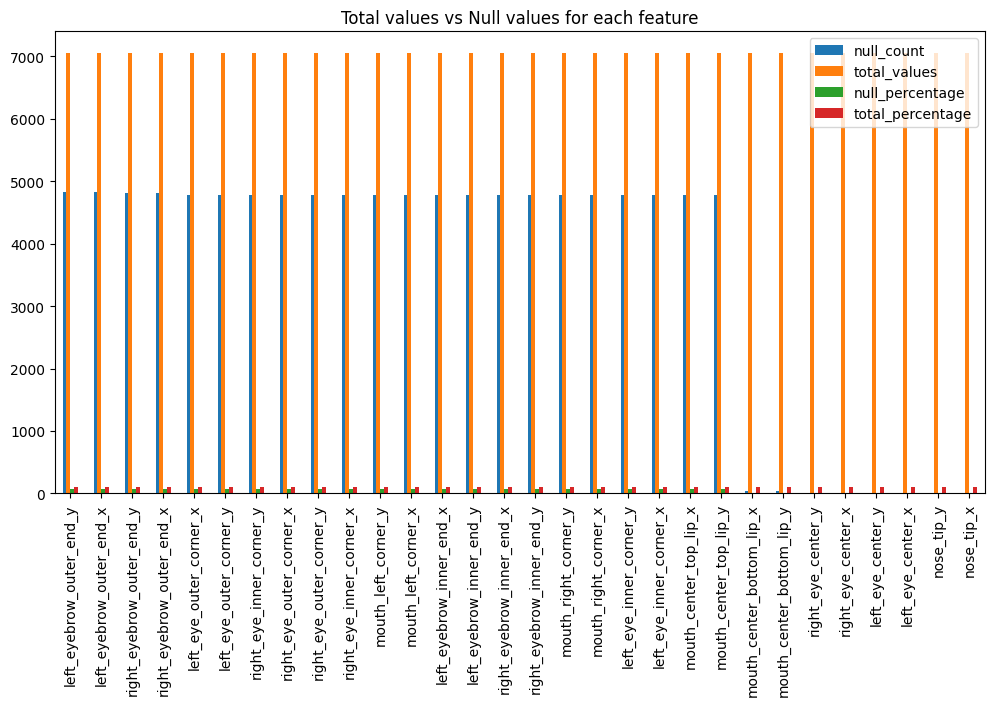

In [11]:

null_stats.plot(kind='bar',figsize=(12,6))
plt.title('Total values vs Null values for each feature')
plt.show()

### Plot displaying the percentage of null values in each feature

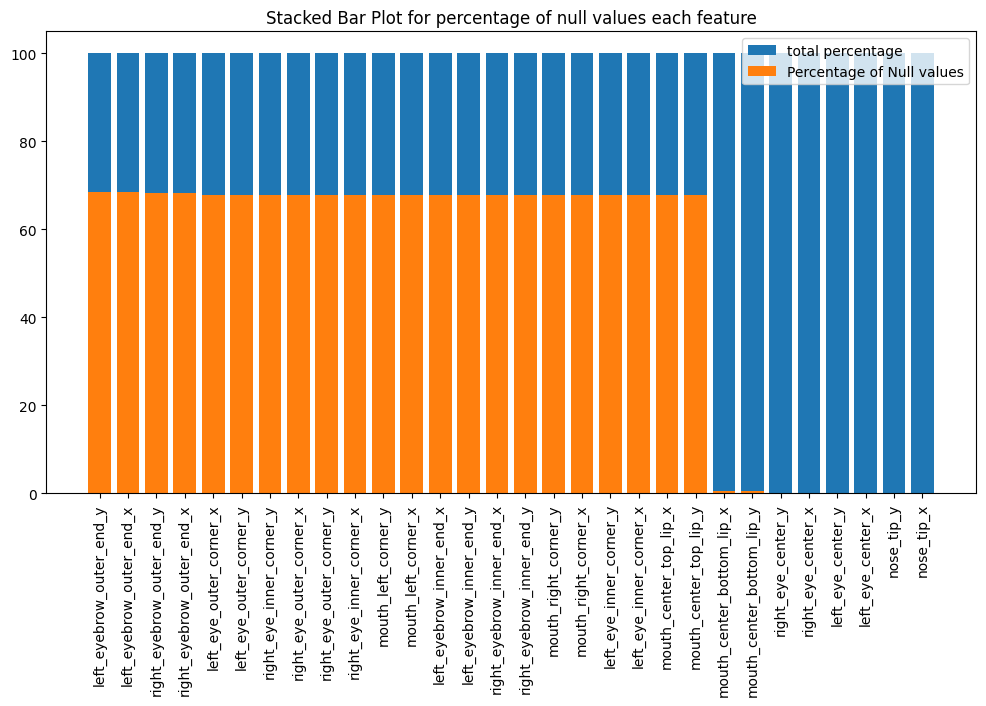

In [12]:
plt.figure(figsize=(12,6))
plt.bar(null_stats.index,null_stats['total_percentage'],label='total percentage')
plt.bar(null_stats.index,null_stats['null_percentage'],label='Percentage of Null values')
plt.xticks(rotation=90)
plt.title('Stacked Bar Plot for percentage of null values each feature')
plt.legend()
plt.show()

# Data Preprocessing

From the above analysis and plots, it is clear that only the features representing the `left eye, right eye, nose tip and mouth center bottom` have very minimal percentage of null values. They have less than 0.5% of null values. All the other features have at least 67% of null values. Since the total null values are many we can not directly drop all the rows that have null values. If we do so, we will be left with only 35% of the current dataset. So, we need to think of different ways in which we can impute those null values. 

We can impute the null values in each column with the mean of its respective column. The mean is usually prone to outliers but when checking the data for many of the images, the images were labelled accurately. We did not find any outliers even after verifying many of the images extensively. This is a hyper parameter. We can even try imputing the median which is not prone to outliers.

In [13]:
# imputing all the null values in the column with mean value of respective column
for i in train_df.columns[:-1]:
    train_df[i].fillna(train_df[i].mean(),inplace=True)

In [14]:
# Displaying the null values after imputing.
train_df.isna().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

Since the null values have been imputed with the mean, we did not find any null values now.

In [15]:
def return_img_array(df):
    """
    Converts the string of pixel values into a numpy array's of size 96X96.
    """
    images=df['Image'].apply(lambda x: np.array(x.split(' '),dtype='int'))
    images=np.stack(images,axis=0).reshape(-1,96,96)/255.0
    return images

# Dividing the columns into features and targets

In [16]:
x_train=return_img_array(train_df)
y_train=train_df[features]
print(f"Shape of x_train (features): {x_train.shape}")
print(f"Shape of y_train (Images): {y_train.shape}")

Shape of x_train (features): (7049, 96, 96)
Shape of y_train (Images): (7049, 30)


# Visualizing a random image

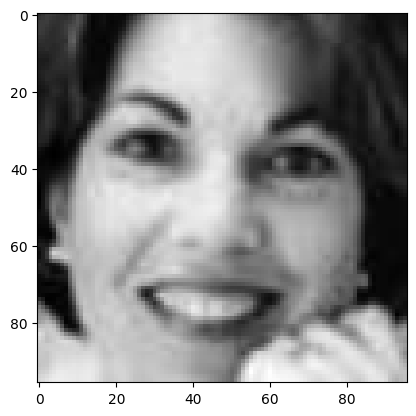

In [17]:
# getting a random index from array of train images.
random_index=np.random.choice(len(x_train))

# Displaying the image in the gray color mode
plt.imshow(x_train[random_index],cmap='gray')
plt.show()

# Displaying a grid of random images

When displaying the random images with their facial keypoints there are high chances that the keypoints might get displaced. This is because we have imputed the null values with the mean. The dataset contains few images with cropped faces and few images with uncropped faces. So, the imputed mean will not always be representing the actual key point properly. 

In [18]:
def display_grid(rows,cols,x_train,y_train):
    """
    Function that generates the grid of random images where number of rows and 
    columns needs to be supplied as arguments to the function.
    """
    plt.figure(figsize=(10,10))
    for i in range(rows*cols):
        random_index=np.random.choice(len(x_train))
        plt.subplot(rows,cols,i+1)
        plt.imshow(x_train[random_index], cmap='gray')
        plt.scatter(y_train[random_index,:,0],y_train[random_index,:,1],marker='x',color='red')
    plt.show()

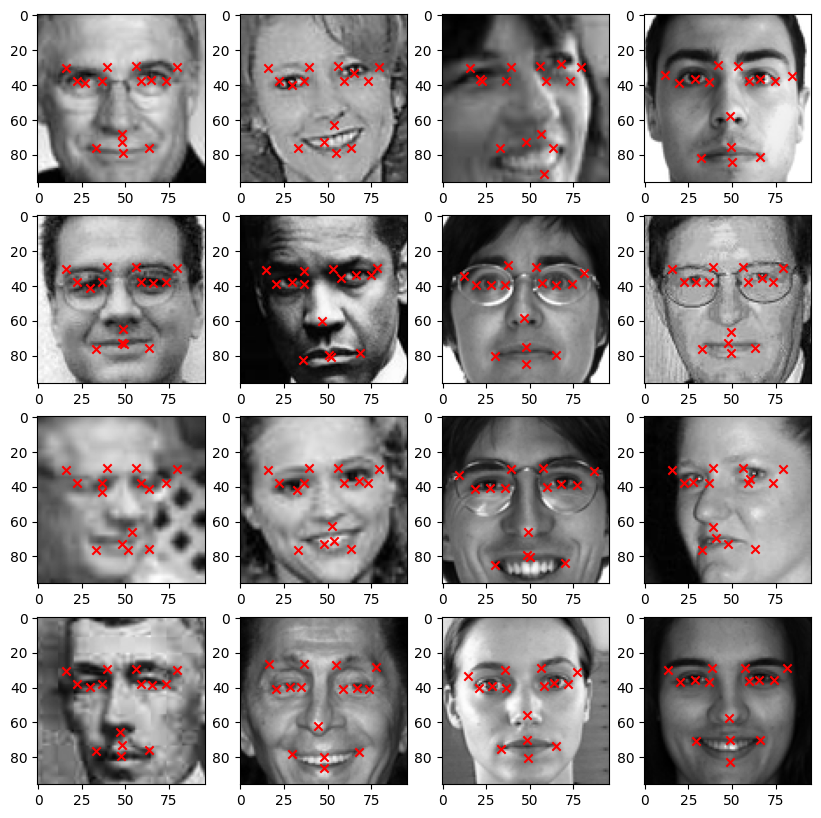

In [19]:
y_train_reshaped=y_train.values.reshape(y_train.shape[0],15,2)
display_grid(4,4,x_train,y_train_reshaped)

# Image with detailed description for marked keypoint

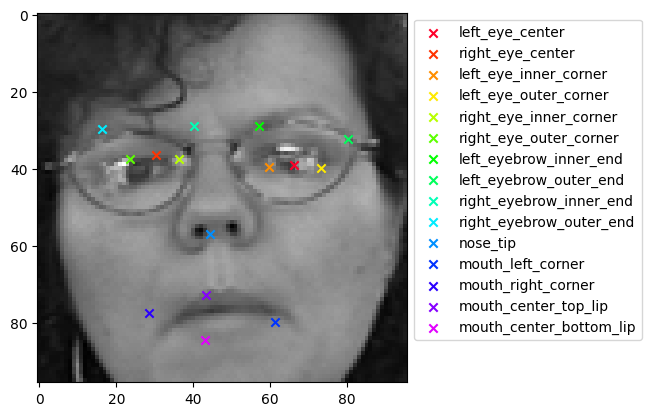

In [20]:
def plot_features(image,feature_names,features_reshaped):
    """
    Function that marks all the facial keypoints on the image with an explanatory
    legend.
    """
    #image=cv2.flip(image,1)
    NUM_COLORS = 15
    cm = plt.get_cmap('gist_rainbow')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

    ax.imshow(image, cmap='gray')
    for n, name in enumerate(feature_names):
        ax.scatter(features_reshaped[0,n,0],features_reshaped[0,n,1],marker='x',label=name)
    ax.legend(bbox_to_anchor=(1,1))
    plt.show()

plot_features(x_train[np.random.choice(len(x_train))],feature_names,y_train_reshaped)

# Data Modeling

In [21]:
# Building a CNN model using Sequential API
model = Sequential([
    Conv2D(64, (5, 5), padding='same', use_bias=False, input_shape=(96, 96, 1)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(128, (4, 4), padding='same', use_bias=False),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(256, (3, 3), padding='same', use_bias=False),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(512, (2, 2), padding='same', use_bias=False),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(30)
])

In [22]:
# printing the summary of the model and parameters.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 64)        1600      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 128)       131072    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 48, 48, 128)       0

# Model architecture with shapes at each layer

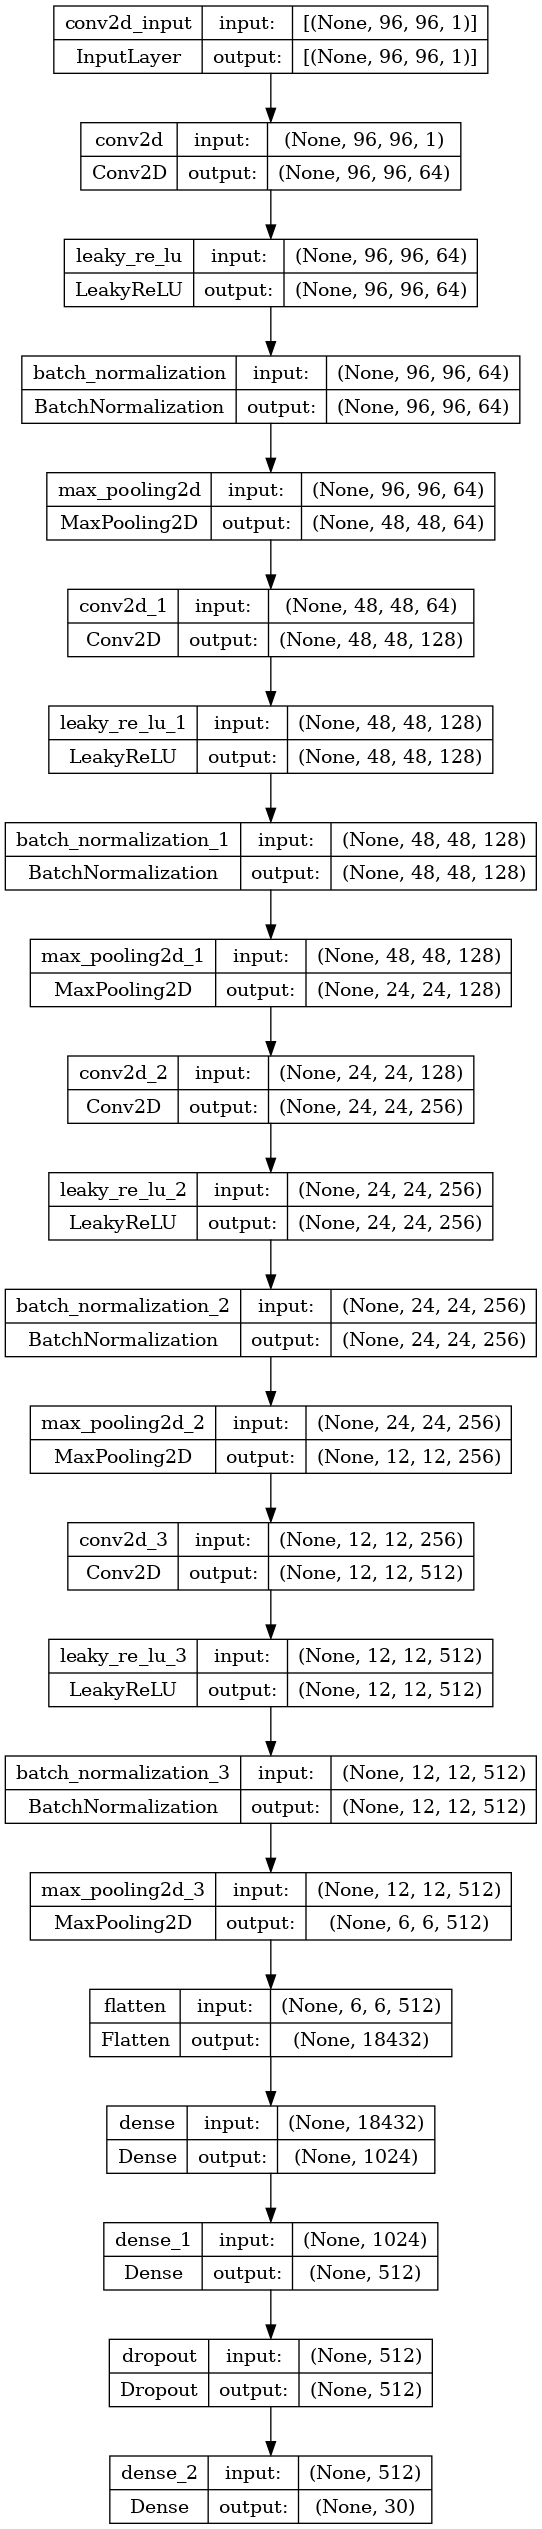

In [23]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Model Training

In [24]:
# initializing few hyper parameters
epochs = 200
batch_size = 128
validation_split = 0.2

In [25]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split = validation_split)

Epoch 1/200
45/45 [==============================] - 21s 152ms/step - loss: 356.1526 - accuracy: 0.1894 - val_loss: 303.7396 - val_accuracy: 0.5738
Epoch 2/200
45/45 [==============================] - 6s 140ms/step - loss: 112.2160 - accuracy: 0.2591 - val_loss: 139.9624 - val_accuracy: 0.5248
Epoch 3/200
45/45 [==============================] - 6s 139ms/step - loss: 85.1456 - accuracy: 0.2935 - val_loss: 77.0961 - val_accuracy: 0.5745
Epoch 4/200
45/45 [==============================] - 6s 135ms/step - loss: 73.3142 - accuracy: 0.3210 - val_loss: 80.9489 - val_accuracy: 0.2730
Epoch 5/200
45/45 [==============================] - 6s 141ms/step - loss: 63.4012 - accuracy: 0.3118 - val_loss: 78.4170 - val_accuracy: 0.5085
Epoch 6/200
45/45 [==============================] - 6s 136ms/step - loss: 59.5947 - accuracy: 0.3414 - val_loss: 55.8251 - val_accuracy: 0.5589
Epoch 7/200
45/45 [==============================] - 6s 143ms/step - loss: 56.9591 - accuracy: 0.3444 - val_loss: 168.5818 - 

In [26]:
# Saving the weights of the model for re-usability
model.save_weights('weights.h5')

# Model Performance

### Displaying the loss and accuracy plot for both training and validation

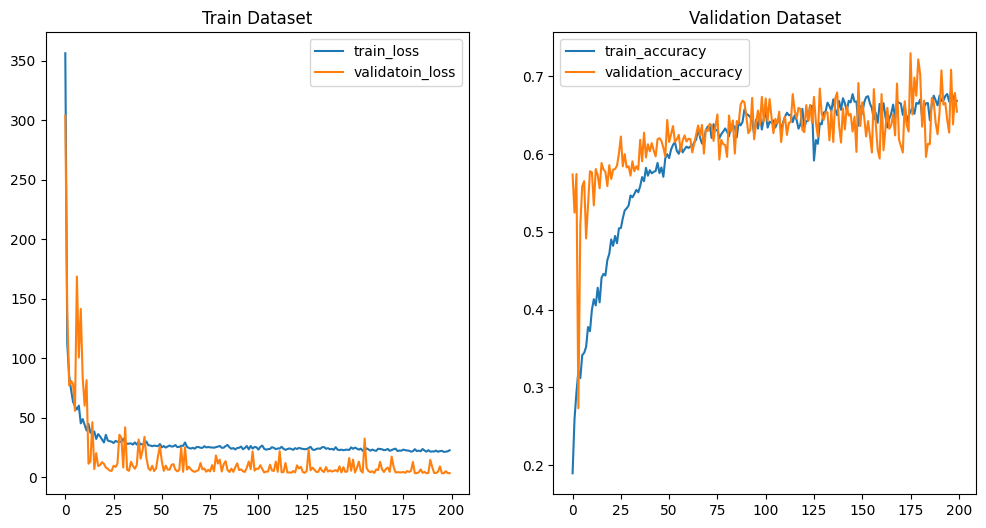

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train Dataset')
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='validatoin_loss')
plt.legend()
plt.subplot(1,2,2)
plt.title('Validation Dataset')
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.show()

# Model Validation

In [28]:
# Getting inferences from the model on the test set.
x_test = return_img_array(test_df)
preds = model.predict(x_test)
print(preds)

56/56 [==============================] - 2s 17ms/step
[[66.66165  36.231438 29.691236 ... 69.76383  47.43096  82.239136]
 [68.2919   37.881977 30.105639 ... 74.58541  48.89135  83.233284]
 [65.831436 36.989716 30.69582  ... 72.32361  49.66576  79.060455]
 ...
 [66.74498  38.580166 31.189695 ... 73.37791  47.409958 77.87077 ]
 [62.704845 36.799694 29.141113 ... 69.641396 44.66215  75.53363 ]
 [67.00325  38.981236 30.346449 ... 74.77425  46.72922  80.12413 ]]


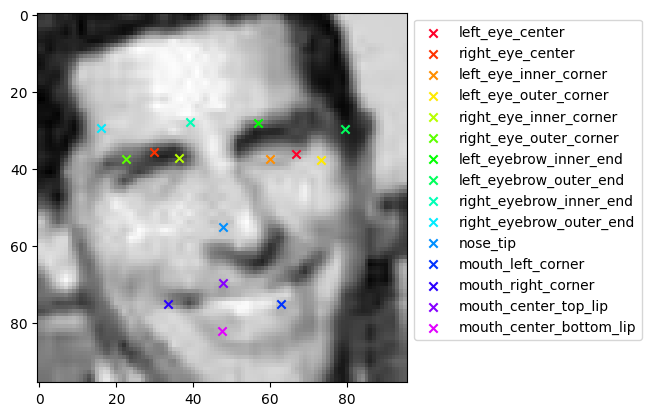

In [29]:
# looking at the results of the model on test images.
x_test_reshaped=preds.reshape(len(preds),15,2)
plot_features(x_test[np.random.choice(len(x_test))],feature_names,x_test_reshaped)

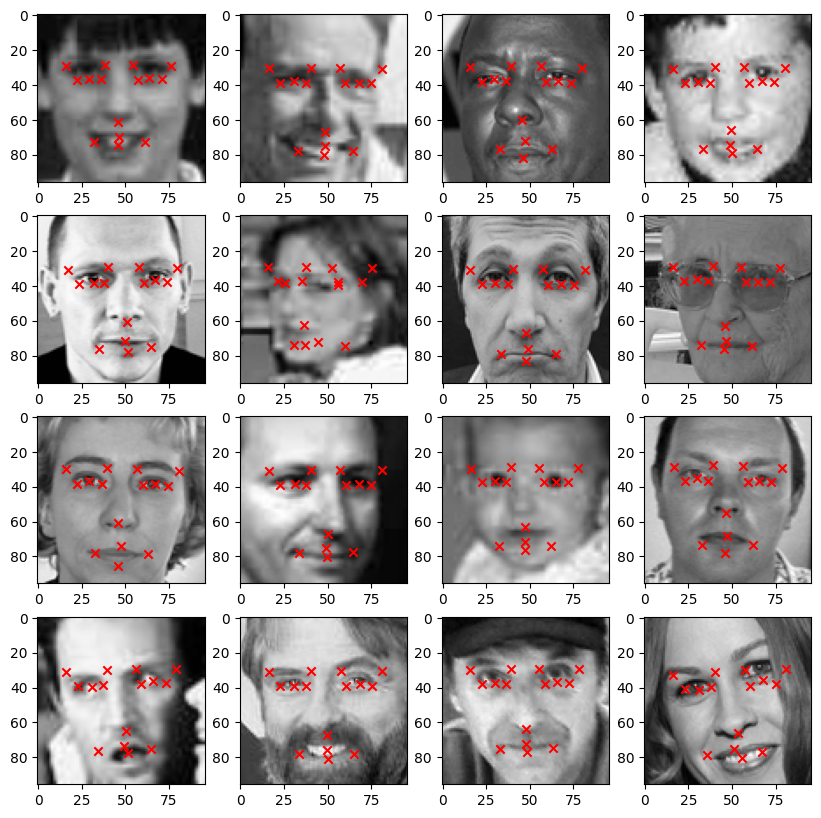

In [30]:
display_grid(4,4,x_test,x_test_reshaped)

# Conclusion/Takeaways

* The approach of imputing the null values is not a good approach. It is not giving us the exact locations of the missing keypoints. Sometimes the mean values are very far from the actual location of the keypoint. This can be observed from generating random grid of images using the above provided functions.

* To be more accurate it is best suggested to fill the null values by looking at the images manually. Otherwise, state of the art techniques can be leveraged to fill those null values. 

* Model performance can be best assessed only if the data is valid. The current approach of imputing with the mean has pushed the model to make inaccurate results. This should not happen. We need to make sure that the data is clean before modeling.

* We know that 35% of the data is clean without any null values. We can even try training a model with only 35% accurate data instead of trying to use the entire data.

* We can even reduce the total facial keypoints that we want to identify to only the features that has less number of null values.